In [ ]:
#Installing & Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go

In [ ]:
drive.mount('/content/gdrive')
!touch "/content/gdrive/MyDrive/files"

Mounted at /content/gdrive


Loading Data

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/fashion-mnist_test.csv')

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print('Shape of training : ',train.shape)
print('Shape of testing : ',test.shape)

Shape of training :  (60000, 785)
Shape of testing :  (10000, 785)


In [ ]:
print("Nulls in training :",train.isna().any().sum())
print("Nulls in testing :",test.isna().any().sum())

Nulls in training : 0
Nulls in testing : 0


In [ ]:
sorted(train.label.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Visualizing the Data

In [ ]:
#The labels consist of an array of integers that ranges from 0 to 9.
#The class names were not added to the dataset so we will add them.
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

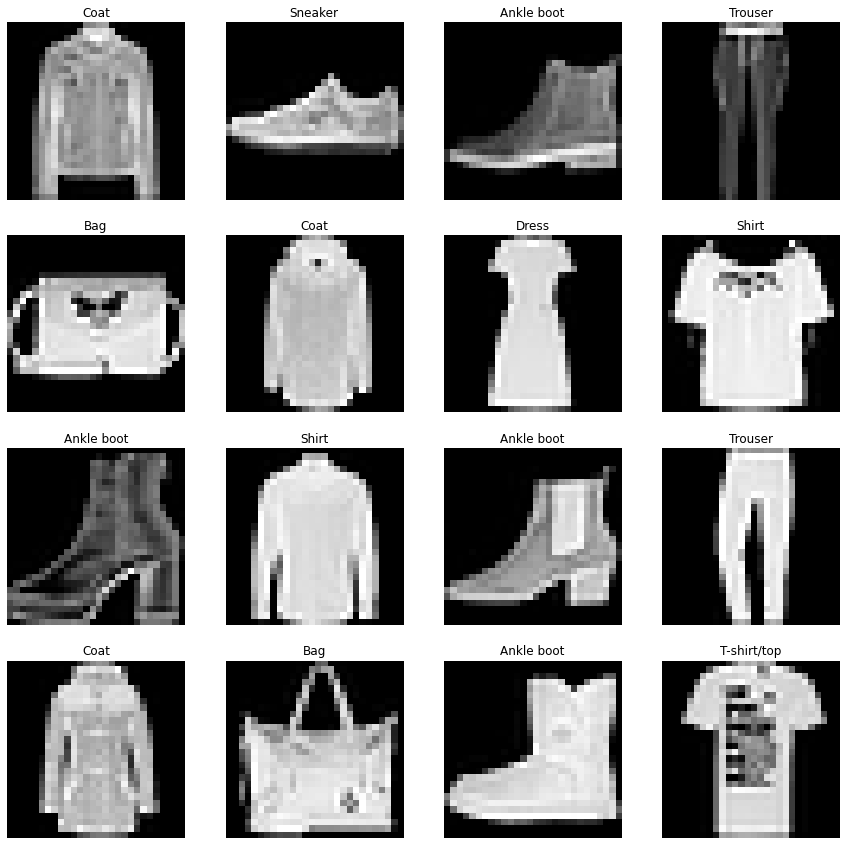

In [ ]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = train.drop('label', axis=1).values[index].reshape(28,28)
        cloths = train['label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(class_names[cloths])
        axe.set_axis_off()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


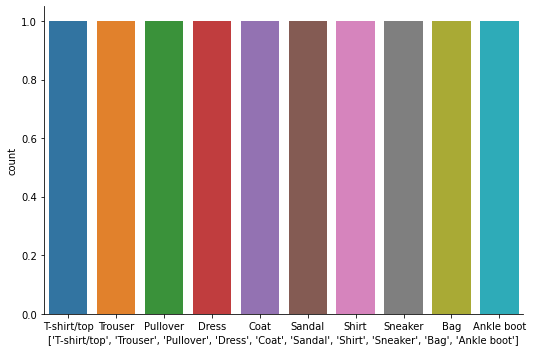

In [ ]:
#labels distribution
sns.factorplot(x=class_names, data=train, kind='count', size=5, aspect= 1.5)

Data Preprocessing 

Splitting Data

In [ ]:
X = train.iloc[:,1:]
Y = train.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

Model Building

KNN

In [ ]:
scores = {}
for k in range(1, 26):
    knn = KNN(n_neighbors=k)
    knn = knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores[k] = accuracy_score(y_test, y_pred)

In [ ]:
besk_K = 0
best_acc = 0
for k in scores:
    print('For K = %d, accuracy = %.2f%%' % (k, scores[k] * 100))
    if scores[k] > best_acc:
        best_acc = scores[k]
        best_K = k

For K = 1, accuracy = 85.52%
For K = 2, accuracy = 84.77%
For K = 3, accuracy = 85.80%
For K = 4, accuracy = 86.02%
For K = 5, accuracy = 85.55%
For K = 6, accuracy = 85.88%
For K = 7, accuracy = 85.40%
For K = 8, accuracy = 85.78%
For K = 9, accuracy = 85.58%
For K = 10, accuracy = 85.50%
For K = 11, accuracy = 85.40%
For K = 12, accuracy = 85.23%
For K = 13, accuracy = 85.13%
For K = 14, accuracy = 85.03%
For K = 15, accuracy = 84.62%
For K = 16, accuracy = 84.77%
For K = 17, accuracy = 84.58%
For K = 18, accuracy = 84.75%
For K = 19, accuracy = 84.60%
For K = 20, accuracy = 84.62%
For K = 21, accuracy = 84.60%
For K = 22, accuracy = 84.45%
For K = 23, accuracy = 84.27%
For K = 24, accuracy = 84.43%
For K = 25, accuracy = 84.25%


In [ ]:
#k=4 gives highest accuracy
knn = KNN(n_neighbors=best_K)
knn = knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

In [ ]:
accuracy1 = accuracy_score(y_test, y_pred)
print('Accuracy = %.2f%%\n' % (accuracy1 * 100))

Accuracy = 86.02%



Confusion Matrix

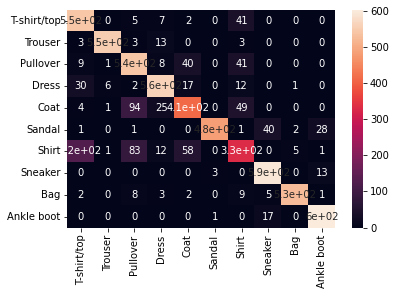

In [ ]:
cm = confusion_matrix(y_test, y_pred)
c = pd.DataFrame(cm,index=class_names,columns=class_names)
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       601
           1       0.98      0.96      0.97       576
           2       0.73      0.85      0.79       642
           3       0.89      0.89      0.89       631
           4       0.78      0.71      0.74       587
           5       0.99      0.87      0.93       556
           6       0.68      0.54      0.60       618
           7       0.91      0.97      0.94       610
           8       0.99      0.95      0.97       558
           9       0.93      0.97      0.95       621

    accuracy                           0.86      6000
   macro avg       0.86      0.86      0.86      6000
weighted avg       0.86      0.86      0.86      6000



Logistic Regression

In [ ]:
lr = LogisticRegression()
lr = lr.fit(x_train, y_train)
pred = lr.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
accuracy2 = accuracy_score(y_test, pred)
print('Accuracy = %.2f%%\n' % (accuracy2 * 100))

Accuracy = 85.47%



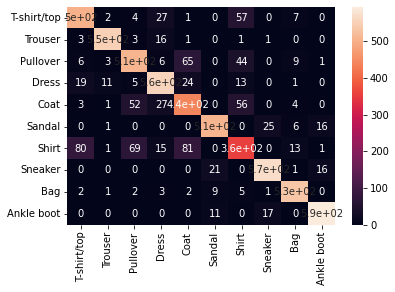

In [ ]:
cm = confusion_matrix(y_test, pred)
c = pd.DataFrame(cm,index=class_names,columns=class_names)
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       601
           1       0.96      0.96      0.96       576
           2       0.79      0.79      0.79       642
           3       0.86      0.88      0.87       631
           4       0.72      0.76      0.74       587
           5       0.93      0.91      0.92       556
           6       0.67      0.58      0.62       618
           7       0.93      0.94      0.93       610
           8       0.93      0.96      0.94       558
           9       0.95      0.95      0.95       621

    accuracy                           0.85      6000
   macro avg       0.85      0.86      0.86      6000
weighted avg       0.85      0.85      0.85      6000



Decision Tree Classifier

In [ ]:
#we will use the grid search to find the optimal hyperparameters
grid = GridSearchCV(estimator=DecisionTreeClassifier(), cv=10, param_grid=dict(max_depth=[2, 3, 4, 5, 6, 7, 8, None]))
grid = grid.fit(x_train, y_train)

In [ ]:
dt = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'])
model = dt.fit(x_train, y_train)
preds = dt.predict(x_test)

In [ ]:
accuracy3 = accuracy_score(y_test, preds)
print('Accuracy = %.2f%%\n' % (accuracy3 * 100))

Accuracy = 80.35%



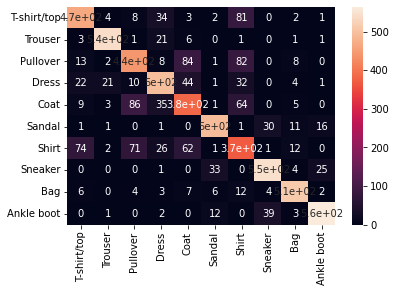

In [ ]:
cm = confusion_matrix(y_test, preds)
c = pd.DataFrame(cm,index=class_names,columns=class_names)
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       601
           1       0.94      0.94      0.94       576
           2       0.71      0.69      0.70       642
           3       0.79      0.79      0.79       631
           4       0.65      0.65      0.65       587
           5       0.90      0.89      0.89       556
           6       0.57      0.60      0.59       618
           7       0.88      0.90      0.89       610
           8       0.91      0.92      0.92       558
           9       0.92      0.91      0.92       621

    accuracy                           0.80      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.80      0.80      0.80      6000



Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

In [ ]:
accuracy4 = accuracy_score(y_test, rf_pred)
print('Accuracy = %.2f%%\n' % (accuracy4 * 100))

Accuracy = 88.48%



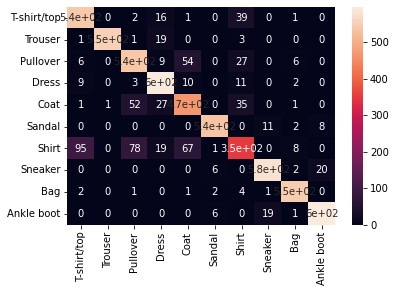

In [ ]:
cm = confusion_matrix(y_test, rf_pred)
c = pd.DataFrame(cm,index=class_names,columns=class_names)
sns.heatmap(c,annot=True)
plt.show()

In [ ]:
#classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       601
           1       1.00      0.96      0.98       576
           2       0.80      0.84      0.82       642
           3       0.87      0.94      0.91       631
           4       0.78      0.80      0.79       587
           5       0.97      0.96      0.97       556
           6       0.75      0.57      0.64       618
           7       0.95      0.95      0.95       610
           8       0.96      0.98      0.97       558
           9       0.96      0.96      0.96       621

    accuracy                           0.88      6000
   macro avg       0.89      0.89      0.88      6000
weighted avg       0.88      0.88      0.88      6000



Model Comparison

In [ ]:
acc_combine = {'Model':  ['KNN','Logistic Regression','Decision Tree Classifier','Random Forest Classifier'],
        'Accuracy_Test': [accuracy1,accuracy2,accuracy3,accuracy4]
        }

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Testing', x=acc_combine['Model'], y=acc_combine['Accuracy_Test'],text=np.round(acc_combine['Accuracy_Test'],2),textposition='outside')
])

fig.update_layout(barmode='group',title_text='Accuracy Comparison On Different Models',yaxis=dict( title='Accuracy'))
fig.show()

 Making prediction (Random Forest classifier) 

In [ ]:
y = y_test[0:5]
pred = rf_pred[0:5]
print("The actual labels :",*y)
print("The predicted labels :",*pred)

The actual labels : 7 8 8 5 9
The predicted labels : 7 8 8 5 9
